In [395]:
from draw3d import *
from itertools import *
from math import sqrt, acos, pi, tan, atan2, atan
from vectors import to_cartesian, to_polar
from random import random

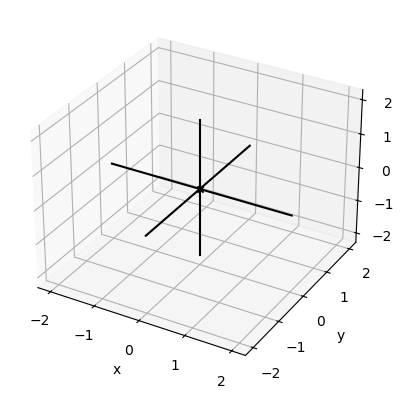

In [396]:
draw3d()

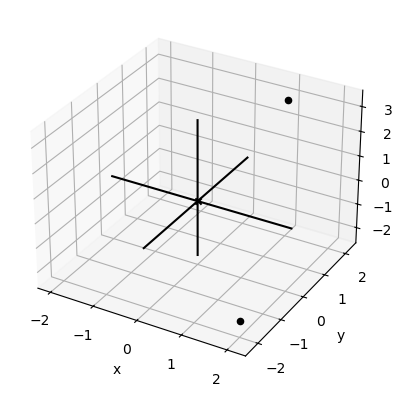

In [397]:
vec1 = (1, 2, 3)
vec2 = (2, -2, -2)
points = [vec1, vec2]
draw3d(Points3D(*points))


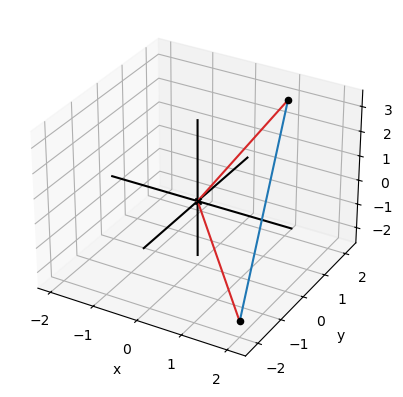

In [398]:
orig=(0,0,0)
draw3d(
    Points3D(*points),
    Segment3D(orig, vec1, color=red),
    Segment3D(orig, vec2, color=red),
    Segment3D(vec1, vec2)
)

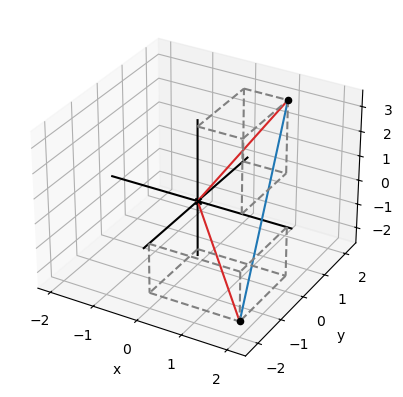

In [399]:

draw3d(
    Points3D(*points),
    Segment3D(orig, vec1, color=red),
    Segment3D(orig, vec2, color=red),
    Segment3D(vec1, vec2),
    Box3D(*vec1),
    Box3D(*vec2),
)

Exercise 3.2-Mini Project: There are exactly eight 3D vectors whose coordinates are all either +1 or −1. For instance, (1, −1, 1) is one of these. Plot all of these eight vectors as points. Then figure out how to connect them with line segments using Segment3D objects to form the outline of a cube.

[(1, 1, 1), (1, 1, -1), (1, -1, 1), (1, -1, -1), (-1, 1, 1), (-1, 1, -1), (-1, -1, 1), (-1, -1, -1)]
8


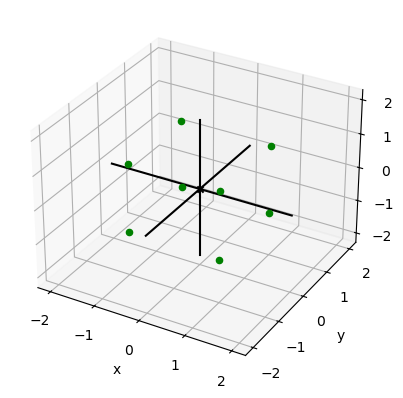

In [400]:
perm = [1, -1]
verticies = [(x,y,z) for x in perm for y in perm for z in perm]
print(verticies)
print(len(verticies))
draw3d(Points3D(*verticies, color="green"))

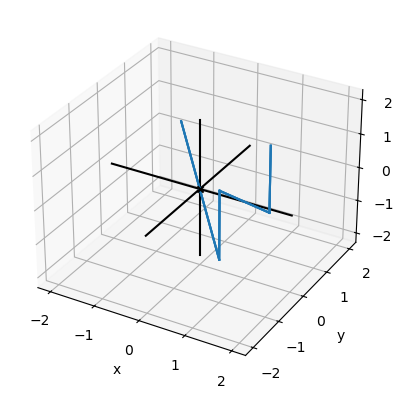

In [401]:
edges = int(len(verticies) / len(perm))
limit = 2 * edges + edges
segments = []
segment_coords = []

for i in range(3):
    counter = 0
    for j in range(4):
        segments.append(Segment3D(verticies[counter + j], verticies[counter + j + 1]))
        segment_coords.append((verticies[counter + j], verticies[counter + j + 1]))
    counter += 4
len(segments)
len(segment_coords)
draw3d(
    # Points3D(*verticies,color=blue),
    *[Segment3D(*edge) for edge in segment_coords]
)

[(1, 1, 1), (1, 1, -1), (1, -1, 1), (1, -1, -1), (-1, 1, 1), (-1, 1, -1), (-1, -1, 1), (-1, -1, -1)]


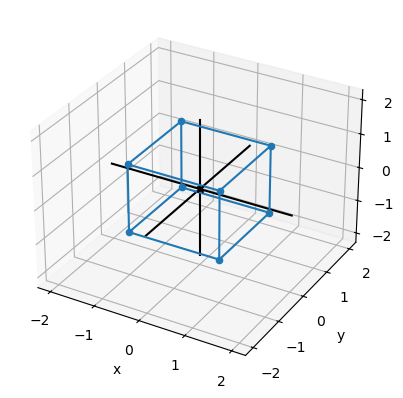

In [402]:
pm1 = [1,-1]
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]
print(vertices)
#  (0 0) (0 1) (1 0) (1 1)
# (x y z)
# ((-1 1 1) (1 1 1)) ((-1 1 -1) (1 1 -1)) ((-1 -1 1) (1 -1 1)) ((-1 -1 -1) (1 -1 -1))
edges = [((-1, y, z),(1, y, z)) for y in pm1 for z in pm1] + [((x, -1, z),(x, 1, z)) for x in pm1 for z in pm1] + [((x, y, -1),(x, y, 1)) for x in pm1 for y in pm1]
draw3d(
    Points3D(*vertices,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

In [403]:
[(x,y) for x in pm1 for y in pm1]

[(1, 1), (1, -1), (-1, 1), (-1, -1)]

In [ ]:
edges_x_fixed = [((-1, y, z),(1, y, z)) for y in pm1 for z in pm1] #+ [((x, -1, z),(x, 1, z)) for x in pm1 for z in pm1] + [((x, y, -1),(x, y, 1)) for x in pm1 for y in pm1]
edges_y_fixed = [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1]
edges_z_fixed = [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]
draw3d(
    Points3D(*vertices,color=blue),
    *[Segment3D(*edge, color=red) for edge in edges_x_fixed],
    *[Segment3D(*edge, color=green) for edge in edges_y_fixed],
    *[Segment3D(*edge, color=purple) for edge in edges_z_fixed],
)

In [ ]:
def add(*vectors):
    return tuple(map(sum, zip(*vectors)))


In [ ]:
v = [(1,1,3),(2,4,-4),(4,2,-2)]
add(*v)


(7, 7, -3)

In [ ]:
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))
length((4,3,12))

13.0

In [ ]:
# def square(x):
#     return x ** 2

def pow(n):
    return lambda x: x ** n

square = pow(2)

def length_f(v):
    return sqrt(sum(map(square,v)))
length_f((4,3,12))

13.0

Exercise 3.3: Draw (4, 0, 3) and (−1, 0, 1) as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D. What is their vector sum?

Their sum is: (3, 0, 4)


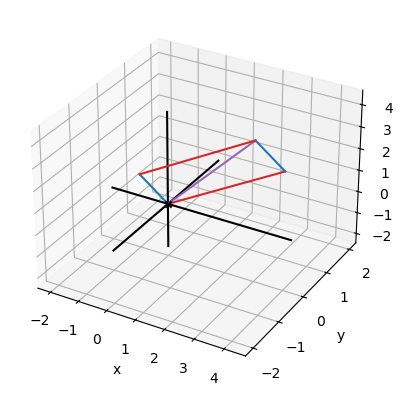

In [ ]:
v1 = (4, 0, 3)
v2 = (-1, 0, 1)
res = add(v1, v2)
print(f"Their sum is: {res}")
draw3d(
    Arrow3D(v1),
    Arrow3D(v2, color=blue),
    Arrow3D(res, color=purple),
    Arrow3D(v1, res, color=blue),
    Arrow3D(res,v2, color=red)
    )

Exercise 3.5−Mini Project: The following comprehension creates a list of 24 Python vectors:

In [ ]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
vs

[(0.0, 1.0, 0.3333333333333333),
 (0.49999999999999994, 0.8660254037844387, 0.3333333333333333),
 (0.8660254037844386, 0.5000000000000001, 0.3333333333333333),
 (1.0, 6.123233995736766e-17, 0.3333333333333333),
 (0.8660254037844387, -0.49999999999999983, 0.3333333333333333),
 (0.49999999999999994, -0.8660254037844387, 0.3333333333333333),
 (1.2246467991473532e-16, -1.0, 0.3333333333333333),
 (-0.4999999999999998, -0.8660254037844388, 0.3333333333333333),
 (-0.8660254037844384, -0.5000000000000004, 0.3333333333333333),
 (-1.0, -1.8369701987210297e-16, 0.3333333333333333),
 (-0.8660254037844386, 0.5000000000000001, 0.3333333333333333),
 (-0.5000000000000004, 0.8660254037844384, 0.3333333333333333),
 (-2.4492935982947064e-16, 1.0, 0.3333333333333333),
 (0.5, 0.8660254037844386, 0.3333333333333333),
 (0.8660254037844384, 0.5000000000000006, 0.3333333333333333),
 (1.0, 1.1943401194869635e-15, 0.3333333333333333),
 (0.8660254037844392, -0.4999999999999992, 0.3333333333333333),
 (0.4999999999

What is the sum of the 24 vectors? Draw all 24 of them tip-to-tail as Arrow3D objects.

Their sum is: (-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


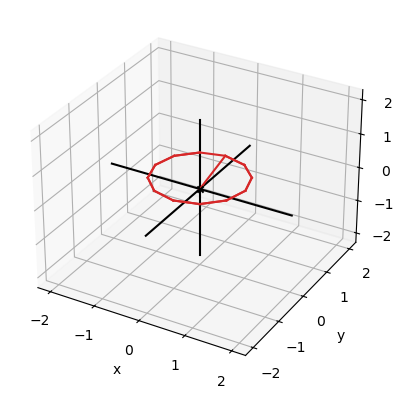

In [ ]:
sum_of_vs = add(*vs)
print(f"Their sum is: {sum_of_vs}")
arrows = [Arrow3D(vs[0])]
for i in range(1, len(vs)):
    arrows.append(Arrow3D(vs[i], vs[i - 1]))
draw3d(
    *arrows
)

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


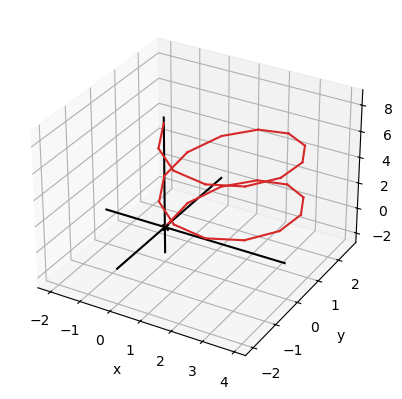

In [ ]:
running_sum = (0,0,0)
arrows = []
for v in vs:
    next_sum = add(running_sum, v)
    arrows.append(Arrow3D(next_sum, running_sum)) 
    running_sum = next_sum
print(running_sum)
draw3d(*arrows)

Exercise 3.6: Write a function scale(scalar,vector) that returns the input scalar times the input vector. Specifically, write it so it works on 2D or 3D vectors, or vectors of any number of coordinates.

In [ ]:
def scale(scalar, vector):
    return tuple(map(lambda i: i * scalar, vector))

In [ ]:
print(scale(2, (1,2)))
print(scale(2, (1, 2, 3)))
print(scale(2, (1, 2, 3, 4, 5,6)))

(2, 4)
(2, 4, 6)
(2, 4, 6, 8, 10, 12)


Exercise 3.9−Mini Project: The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number. This is unusual because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational number. Find a different triple of whole numbers that define coordinates of a vector with a whole number length.

In [ ]:
def get_even_length_vector(max_num):
    for a in range(1, max_num):
        for b in range(1, a + 1):
            for c in range(1, b + 1):
                s = length_f((a, b, c))
                if (s.is_integer()):
                    # print(s, (a, b, c))
                    yield (a, b, c)

In [ ]:
[print (v) in get_even_length_vector(100)]

(-0.5000000000000014, 0.8660254037844378, 0.3333333333333333)


[False]

Exercise 3.10: Find a vector in the same direction as (−1, −1, 2) but which has length 1.

Length of v = 2.449489742783178.
To get length 1 with the same directions as v ((-1, -1, 2)), scale v with 0.4082482904638631, its coordinates are (-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)


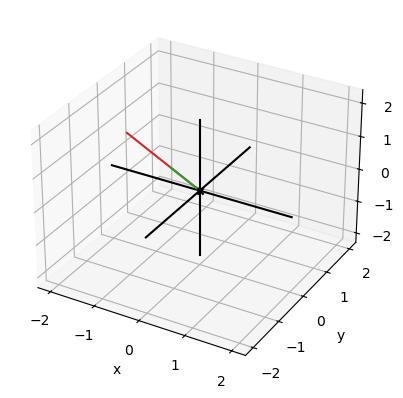

In [ ]:
v = (-1, -1, 2)
v_len = length_f(v)
scalar = 1 / v_len
scaled_v = scale(scalar, v)
print(f"Length of v = {v_len}.\nTo get length 1 with the same directions as v ({v}), scale v with {scalar}, its coordinates are {scaled_v}")
draw3d(Arrow3D(v), Arrow3D(scaled_v, color=green))

In [ ]:
def dot(*vectors):
    return sum(map(lambda t: t[0] * t[1], zip(*vectors)))

In [ ]:
def get_angle(v1, v2):
    v1_len = length_f(v1)
    v2_len = length_f(v2)
    dot_prod = dot(v1, v2)
    alpha = dot_prod / int(v1_len * v2_len)
    return acos(alpha)

In [ ]:
dot(v, scaled_v)

2.4494897427831783

In [ ]:
v1 = (1, 2, 2)
v2 = (2, 2, 1)
v1_len = length_f(v1)
v2_len = length_f(v2)
# print(v1_len, v2_len)
dot_prod = dot(v1, v2)
alpha = dot_prod / int(v1_len * v2_len)
# dot prod (v1, v2) = len(v1) * len(v2) * cos(alpha)
angle = acos(alpha)
(angle * 180/pi)

27.266044450732828

Exercise 3.15-Mini Project: Find a vector u of length 3 and a vector v of length 7 such that u · v = 21. Find another pair of vectors u and v such that u · v = −21. Finally, find three more pairs of vectors of respective lengths 3 and 7 and show that all of their lengths lie between −21 and 21.

In [ ]:
u = (3, 0, 0)
v = (7, 0, 0)
print(dot(u, v))
print(dot(scale(-1, u), v))

21
-21


In [ ]:
def vector_with_given_length(l):
    return to_cartesian((l, 2 * pi * random()))
vectors = [(vector_with_given_length(3.0), vector_with_given_length(7.0)) for _ in range(3)]
print(vectors)
for (u,v) in vectors:
    print("u = %s, v  = %s" % (u,v))
    print("length of u: %f, length of v: %f, dot product :%f" %
                (length(u), length(v), dot(u,v)))

[((-1.390232534494889, 2.6584306460827447), (-6.912057994358442, -1.1060986767126866)), ((1.0077102521576902, 2.8256893048770038), (-4.360080280071637, -5.476285232831691)), ((0.5598667583976137, -2.9472952367961627), (1.5930795848124688, 6.816311131136381))]
u = (-1.390232534494889, 2.6584306460827447), v  = (-6.912057994358442, -1.1060986767126866)
length of u: 3.000000, length of v: 7.000000, dot product :6.668881
u = (1.0077102521576902, 2.8256893048770038), v  = (-4.360080280071637, -5.476285232831691)
length of u: 3.000000, length of v: 7.000000, dot product :-19.867978
u = (0.5598667583976137, -2.9472952367961627), v  = (1.5930795848124688, 6.816311131136381)
length of u: 3.000000, length of v: 7.000000, dot product :-19.197769


Exercise 3.17-Mini Project: Find the angle between (3, 4) and (4, 3) by converting them to polar coordinates and taking the difference of the angles. The answer is:
1.1.569
0.927
0.643
0.284

In [ ]:
def angle_for_vector(v):
    x,y = v[0], v[1]
    angle = atan2(y,x)
    return angle


u = (3, 4)
v = (4, 3)
polar_u = to_polar(u)
polar_v = to_polar(v)
print(atan(3/4))
print(polar_u, polar_v)

# (rad * 180) / pi
# (angle_between(u) * 180) / pi
angle_of_u = angle_for_vector(u)
angle_of_v = angle_for_vector(v)


NameError: name 'atan' is not defined